In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv("/home/aamin/files/marketing/copy/reports_data/tie_up_data.csv")

/home/aamin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (5,7,12,13,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df.drop("Unnamed: 0",axis = 1,inplace=True)

In [22]:
df.loc[(df["Link clicked"].isna() == False),'label']=1
df.loc[(df["Link clicked"].isna() == True),'label']=0
df[['label']] = df[['label']].astype(np.int64)

In [19]:
df.columns

Index(['Broadcast ID', 'Broadcast name', 'Mobile number',
       'Primary Key (User_id)', 'Link clicked', 'Delivered Time',
       'Clicked time', 'Delivered Date', 'Delivery Time', 'Hour of Day',
       'Day of Week', 'Clicked Date', 'Click Time', 'Clicked Hour of Day',
       'Message', 'Published date', 'Status', 'Remark', 'Operator', 'Circle',
       'SMS Language', 'category', 'label_drate'],
      dtype='object')

In [25]:
df_copy = df[['Broadcast ID', 'Broadcast name', 'Mobile number',
              'Link clicked', 'Delivered Time',
              'Clicked time', 'Delivered Date', 'Delivery Time', 
              'Hour of Day','Day of Week', 'Clicked Date', 'Click Time', 
              'Clicked Hour of Day', 'Message', 'Status', 'Circle',
              'SMS Language', 'label']]

In [31]:
df_copy['Delivered_Date_day'] = df_copy['Delivered Date'].apply(lambda x: x.split('-')[2])
df_copy['Delivered_Date_month'] = df_copy['Delivered Date'].apply(lambda x: x.split('-')[1])

/tmp/ipykernel_92628/3626657916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Delivered_Date_day'] = df_copy['Delivered Date'].apply(lambda x: x.split('-')[2])
/tmp/ipykernel_92628/3626657916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Delivered_Date_month'] = df_copy['Delivered Date'].apply(lambda x: x.split('-')[1])


In [69]:
df_copy

,Broadcast ID,Broadcast name,Mobile number,Link clicked,Delivered Time,Clicked time,Delivered Date,Delivery Time,Hour of Day,Day of Week,Clicked Date,Click Time,Clicked Hour of Day,Message,Status,Circle,SMS Language,label,Delivered_Date_day,Delivered_Date_month
0,5462,Tie Up ASPPL 1609,9057238912,https://mshblf.page.link/EGF4,2022-09-16 11:13:32,2022-09-16 11:13:40,2022-09-16,11:13:32,11,Friday,2022-09-16,11:13:40,11.0,"Dear Customer, Congratulations! As an employee...",Delivered,Karnataka,en,1,16,09
1,5462,Tie Up ASPPL 1609,8892099180,https://mshblf.page.link/EGF4,2022-09-16 11:13:30,2022-09-16 11:13:33,2022-09-16,11:13:30,11,Friday,2022-09-16,11:13:33,11.0,"Dear Customer, Congratulations! As an employee...",Delivered,Karnataka,en,1,16,09
2,5462,Tie Up ASPPL 1609,9930656757,https://mshblf.page.link/EGF4,2022-09-16 11:15:35,2022-09-16 11:15:38,2022-09-16,11:15:35,11,Friday,2022-09-16,11:15:38,11.0,"Dear Customer, Congratulations! As an employee...",Delivered,Karnataka,en,1,16,09
3,5462,Tie Up ASPPL 1609,9738285476,https://mshblf.page.link/EGF4,2022-09-16 11:13:30,2022-09-16 11:13:33,2022-09-16,11:13:30,11,Friday,2022-09-16,11:13:33,11.0,"Dear Customer, Congratulations! As an employee...",Delivered,Karnataka,en,1,16,09
4,5462,Tie Up ASPPL 1609,8618019556,https://mshblf.page.link/EGF4,2022-09-16 11:13:31,2022-09-16 11:13:32,2022-09-16,11:13:31,11,Friday,2022-09-16,11:13:32,11.0,"Dear Customer, Congratulations! As an employee...",Delivered,Karnataka,en,1,16,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93397,5639,Tie Up Vinolya Hindi 2511,9972363521,NaN,2022-11-25 10:56:11,NaN,2022-11-25,10:56:11,10,Friday,NaN,NaN,NaN,"प्रिय ग्राहक, बधाई! आपकी कंपनी हमारा अनन्य शुभ...",Delivered,Karnataka,hi,0,25,11
93398,5639,Tie Up Vinolya Hindi 2511,9945768371,NaN,2022-11-25 10:56:14,NaN,2022-11-25,10:56:14,10,Friday,NaN,NaN,NaN,"प्रिय ग्राहक, बधाई! आपकी कंपनी हमारा अनन्य शुभ...",Delivered,Karnataka,hi,0,25,11
93399,5639,Tie Up Vinolya Hindi 2511,9741814983,NaN,2022-11-25 10:56:15,NaN,2022-11-25,10:56:15,10,Friday,NaN,NaN,NaN,"प्रिय ग्राहक, बधाई! आपकी कंपनी हमारा अनन्य शुभ...",Delivered,Karnataka,hi,0,25,11
93400,5639,Tie Up Vinolya Hindi 2511,9611708813,NaN,2022-11-25 10:56:11,NaN,2022-11-25,10:56:11,10,Friday,NaN,NaN,NaN,"प्रिय ग्राहक, बधाई! आपकी कंपनी हमारा अनन्य शुभ...",Delivered,Karnataka,hi,0,25,11


In [109]:
circle_delv= pd.DataFrame(df[df['Status']=='Delivered'].groupby(by = ["Circle","SMS Language",
                                                                        "Broadcast name","Day of Week","Hour of Day"]).Status.count())

circle_delv.rename(columns= {'Status': 'sms_delivered'}, inplace=True)


circle_df = pd.DataFrame(df_copy.groupby(by = ["Circle","SMS Language",
                                               "Broadcast name","Day of Week","Hour of Day"]).Status.count())
circle_df.rename(columns= {'Status': 'sms_sent'}, inplace=True)


circle_delv_rate_df = pd.merge(circle_df,circle_delv, how= 'outer', 
               on =  ["Circle","SMS Language",
                        "Broadcast name","Day of Week","Hour of Day"])


circle_delv_rate_df.fillna(0, inplace = True)
circle_delv_rate_df['delivery_rate'] = circle_delv_rate_df['sms_delivered']*100 / circle_delv_rate_df['sms_sent']
circle_delv_rate_df




click= pd.DataFrame(df[df['Clicked Date']==df['Clicked Date']].groupby(by = ["Circle","SMS Language",
                                               "Broadcast name","Day of Week","Hour of Day"]).Status.count())
click.rename(columns= {'Status': 'sms_clicked'}, inplace=True)
# click

click_rate_df = pd.merge(circle_delv_rate_df,click, how= 'outer', 
                         on = ["Circle","SMS Language","Broadcast name","Day of Week","Hour of Day"])

click_rate_df.fillna(0, inplace = True)
click_rate_df['clicked_rate'] = click_rate_df['sms_clicked']*100 / click_rate_df['sms_delivered']
click_rate_df.fillna(0, inplace = True)
# click_rate_df

In [111]:
click_rate_df.loc["Karnataka","en",:,:]

sms_sent  \
Circle    SMS Language Broadcast name              Day of Week Hour of Day             
Karnataka en           Tie Up ASPPL 0709           Wednesday   16                218   
                                                               17                  9   
                                                               18                  1   
                                                               21                  2   
                                                               22                  3   
...                                                                              ...   
                       Tie Up Vinolya English 2511 Friday      14                  2   
                                                               15                  1   
                                                               16                  2   
                                                               17                  5   
                                                               18                 23   

                                                                            sms_delivered  \
Circle    SMS Language Broadcast name              Day of Week Hour of Day                  
Karnataka en           Tie Up ASPPL 0709           Wednesday   16                   151.0   
                                                               17                     4.0   
                                                               18                     1.0   
                                                               21                     1.0   
                                                               22                     0.0   
...                                                                                   ...   
                       Tie Up Vinolya English 2511 Friday      14                     2.0   
                                                               15                     1.0   
                                                               16                     2.0   
                                                               17                     5.0   
                                                               18                     3.0   

                                                                            delivery_rate  \
Circle    SMS Language Broadcast name              Day of Week Hour of Day                  
Karnataka en           Tie Up ASPPL 0709           Wednesday   16               69.266055   
                                                               17               44.444444   
                                                               18              100.000000   
                                                               21               50.000000   
                                                               22                0.000000   
...                                                                                   ...   
                       Tie Up Vinolya English 2511 Friday      14              100.000000   
                                                               15              100.000000   
                                                               16              100.000000   
                                                               17              100.000000   
                                                               18               13.043478   

                                                                            sms_clicked  \
Circle    SMS Language Broadcast name              Day of Week Hour of Day                
Karnataka en           Tie Up ASPPL 0709           Wednesday   16                  15.0   
                                                               17                   1.0   
                                                               18                   0.0   
                                                        

In [65]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / (period * 2 * np.pi)))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / (period * 2 * np.pi)))

Text(0.5, 0.98, 'Cyclical encoding with sine/cosine transformation')

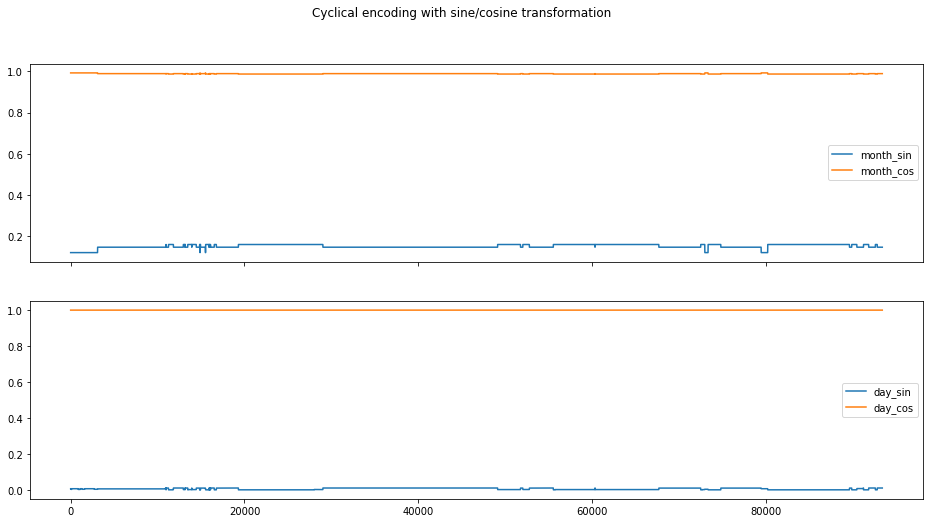

In [68]:
X_2 = df_copy.copy()

X_2["month"] = X_2["Delivered_Date_month"]

X_2["Delivered_Date_month"] = X_2["Delivered_Date_month"].astype(np.int64)
X_2["Delivered_Date_day"] = X_2["Delivered_Date_day"].astype(np.int64)

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2["Delivered_Date_month"])
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2["Delivered_Date_month"])

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2["Delivered_Date_day"])
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2["Delivered_Date_day"])

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation")

In [70]:
X_2 = df_copy.copy()

X_2["month"] = X_2["Clicked Hour of Day"]

X_2["Clicked Hour of Day"] = X_2["Clicked Hour of Day"].astype(np.int64)
X_2["Delivered_Date_day"] = X_2["Delivered_Date_day"].astype(np.int64)

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2["Clicked Hour of Day"])
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2["Clicked Hour of Day"])

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2["Delivered_Date_day"])
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2["Delivered_Date_day"])

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation")

ValueError: Cannot convert non-finite values (NA or inf) to integer